In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.dates as mdates

In [11]:
training_df = pd.read_csv('data/training_set_VU_DM.csv')
#test_df = pd.read_csv('/kaggle/input/vu-dmt-assigment-2-2023/test_set_VU_DM.csv')

In [12]:
print(training_df.columns)

Index(['srch_id', 'date_time', 'site_id', 'visitor_location_country_id',
       'visitor_hist_starrating', 'visitor_hist_adr_usd', 'prop_country_id',
       'prop_id', 'prop_starrating', 'prop_review_score', 'prop_brand_bool',
       'prop_location_score1', 'prop_location_score2',
       'prop_log_historical_price', 'position', 'price_usd', 'promotion_flag',
       'srch_destination_id', 'srch_length_of_stay', 'srch_booking_window',
       'srch_adults_count', 'srch_children_count', 'srch_room_count',
       'srch_saturday_night_bool', 'srch_query_affinity_score',
       'orig_destination_distance', 'random_bool', 'comp1_rate', 'comp1_inv',
       'comp1_rate_percent_diff', 'comp2_rate', 'comp2_inv',
       'comp2_rate_percent_diff', 'comp3_rate', 'comp3_inv',
       'comp3_rate_percent_diff', 'comp4_rate', 'comp4_inv',
       'comp4_rate_percent_diff', 'comp5_rate', 'comp5_inv',
       'comp5_rate_percent_diff', 'comp6_rate', 'comp6_inv',
       'comp6_rate_percent_diff', 'comp7_rate'

In [13]:
training_df.head()

,srch_id,date_time,site_id,visitor_location_country_id,visitor_hist_starrating,visitor_hist_adr_usd,prop_country_id,prop_id,prop_starrating,prop_review_score,...,comp6_rate_percent_diff,comp7_rate,comp7_inv,comp7_rate_percent_diff,comp8_rate,comp8_inv,comp8_rate_percent_diff,click_bool,gross_bookings_usd,booking_bool
0,1,2013-04-04 08:32:15,12,187,NaN,NaN,219,893,3,3.5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,0,NaN,0
1,1,2013-04-04 08:32:15,12,187,NaN,NaN,219,10404,4,4.0,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,0,NaN,0
2,1,2013-04-04 08:32:15,12,187,NaN,NaN,219,21315,3,4.5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,0,NaN,0
3,1,2013-04-04 08:32:15,12,187,NaN,NaN,219,27348,2,4.0,...,NaN,NaN,NaN,NaN,-1.0,0.0,5.0,0,NaN,0
4,1,2013-04-04 08:32:15,12,187,NaN,NaN,219,29604,4,3.5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,0,NaN,0


/tmp/ipykernel_32/3890094477.py:11: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  grouped_data_0 = filtered_data_0.groupby('position')['click_bool', 'booking_bool'].sum().reset_index()
/tmp/ipykernel_32/3890094477.py:17: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  grouped_data_1 = filtered_data_1.groupby('position')['click_bool', 'booking_bool'].sum().reset_index()


<Figure size 3000x300 with 0 Axes>

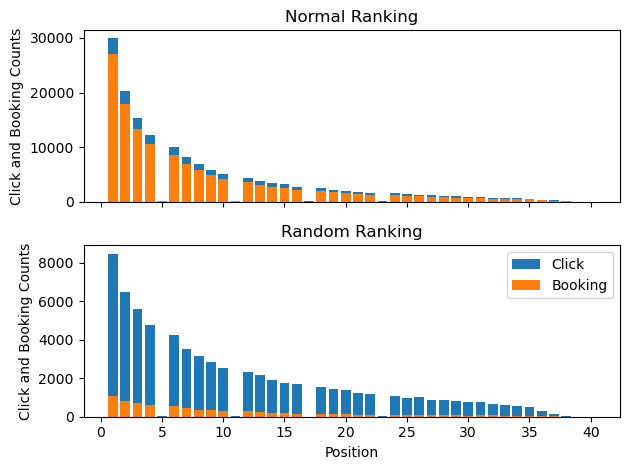

In [16]:
# Group by position and count the number of clicks and reservations
data = training_df

filtered_data_0 = data[data['random_bool'] == 0]
grouped_data_0 = filtered_data_0.groupby('position')['click_bool', 'booking_bool'].sum().reset_index()
filtered_data_1 = data[data['random_bool'] == 1]
grouped_data_1 = filtered_data_1.groupby('position')['click_bool', 'booking_bool'].sum().reset_index()

plt.figure(figsize=(30, 3))
fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True)

ax1.bar(grouped_data_0['position'], grouped_data_0['click_bool'], label='Click')
ax1.bar(grouped_data_0['position'], grouped_data_0['booking_bool'], label='Booking')
ax1.set_ylabel('Click and Booking Counts')
ax2.set_xlabel('Position')
ax1.set_title('Normal Ranking')

ax2.bar(grouped_data_1['position'], grouped_data_1['click_bool'], label='Click')
ax2.bar(grouped_data_1['position'], grouped_data_1['booking_bool'], label='Booking')
ax2.set_xlabel('Position')
ax2.set_ylabel('Click and Booking Counts')
ax2.set_title('Random Ranking')

fig.tight_layout()
plt.legend()

plt.show()


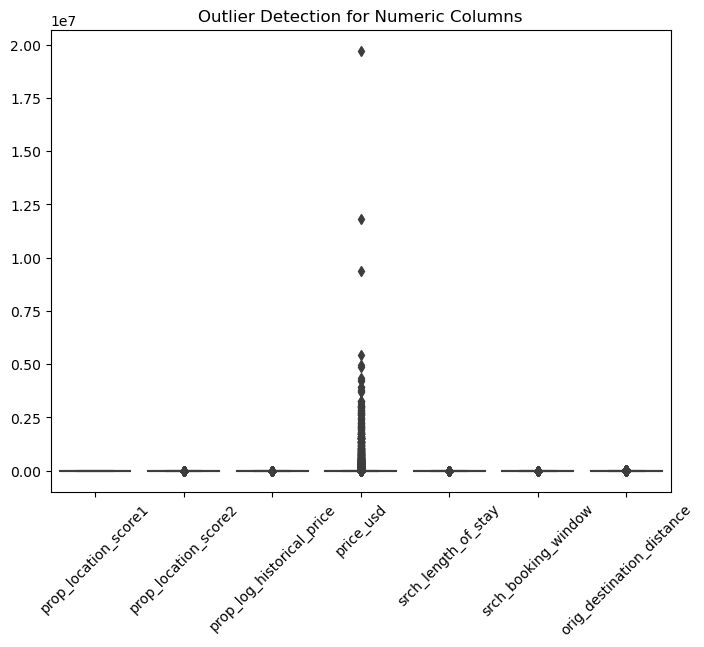

In [32]:
# outlier detection
numeric_columns = ['prop_location_score1', 'prop_location_score2', 'prop_log_historical_price', 'price_usd', 'srch_length_of_stay',
               'srch_booking_window', 'orig_destination_distance']

plt.figure(figsize=(8, 6))
sns.boxplot(training_df[numeric_columns])
plt.xticks(rotation=45)
plt.title('Outlier Detection for Numeric Columns')
plt.savefig('/kaggle/working/outlier_1.png', dpi=300)
plt.show()

In [33]:
# Calculate standard deviations for each numerical column
stds = training_df[numeric_columns].std()

# Calculate medians for each numerical column
medians = training_df[numeric_columns].median()

# Define the standard deviation multiplier
std_multiplier = 3

# Detect outliers
outliers = training_df[(np.abs((training_df[numeric_columns] - medians) / stds) > std_multiplier).any(axis=1)]

# Correct outliers by replacing them with the median values
training_df.loc[outliers.index, numeric_columns] = medians


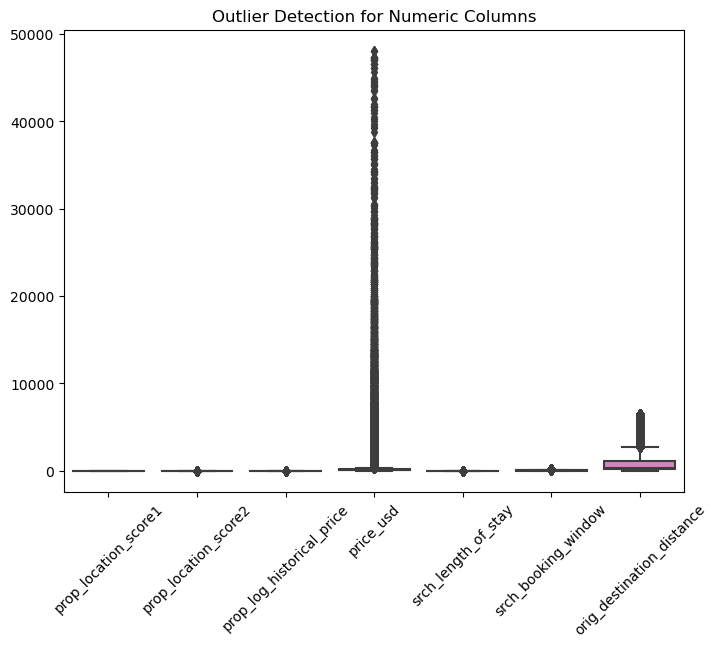

In [34]:
# Plot after outlier correction
plt.figure(figsize=(8, 6))
sns.boxplot(training_df[numeric_columns])
plt.xticks(rotation=45)
plt.title('Outlier Detection for Numeric Columns')
plt.savefig('/kaggle/working/outlier_2.png', dpi=300)
plt.show()

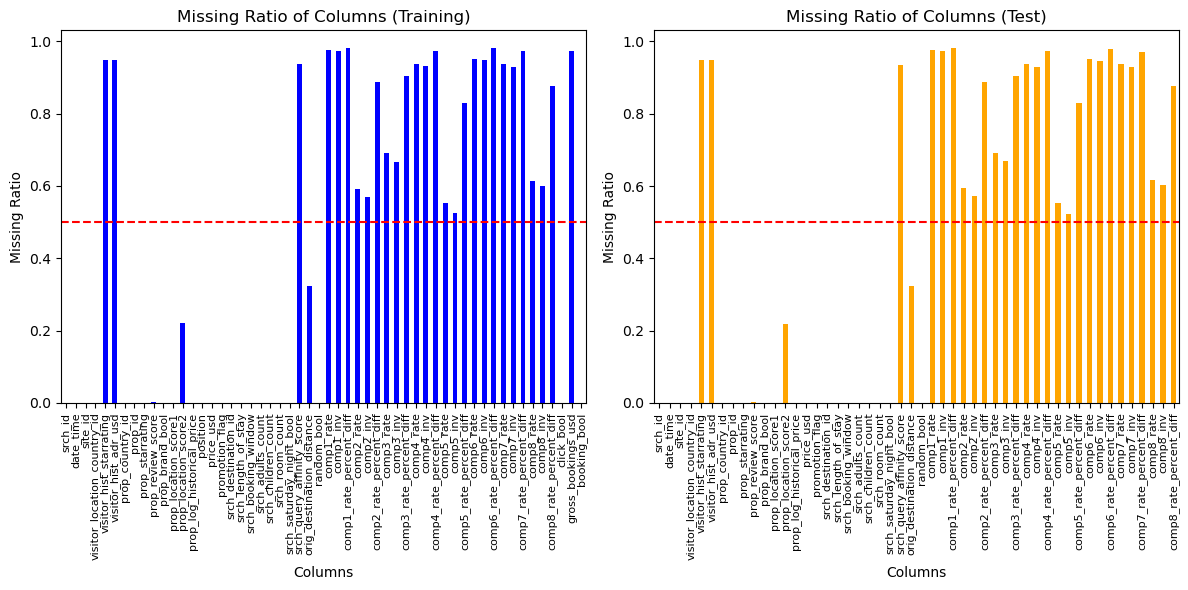

In [10]:
# Calculate the missing value proportions for training_df
train_missing_ratio = pd.to_numeric(training_df.isnull().mean())

# Calculate the missing value proportions for test_df
test_missing_ratio = pd.to_numeric(test_df.isnull().mean())

# Create a figure with two subplots
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))

# Plot missing value proportions for training_df
train_missing_ratio.plot(kind='bar', color='blue', ax=axes[0])
axes[0].set_xlabel('Columns')
axes[0].set_ylabel('Missing Ratio')
axes[0].set_title('Missing Ratio of Columns (Training)')
axes[0].set_xticklabels(axes[0].get_xticklabels(), fontsize=8)  # Set x-axis labels font size

# Plot missing value proportions for test_df
test_missing_ratio.plot(kind='bar', color='orange', ax=axes[1])
axes[1].set_xlabel('Columns')
axes[1].set_ylabel('Missing Ratio')
axes[1].set_title('Missing Ratio of Columns (Test)')
axes[1].set_xticklabels(axes[1].get_xticklabels(), fontsize=8)  # Set x-axis labels font size

# Add a horizontal line at y=0.5
axes[0].axhline(y=0.5, color='red', linestyle='--')
axes[1].axhline(y=0.5, color='red', linestyle='--')

plt.tight_layout()
plt.show()


/tmp/ipykernel_33/2509345210.py:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = training_df.corr()


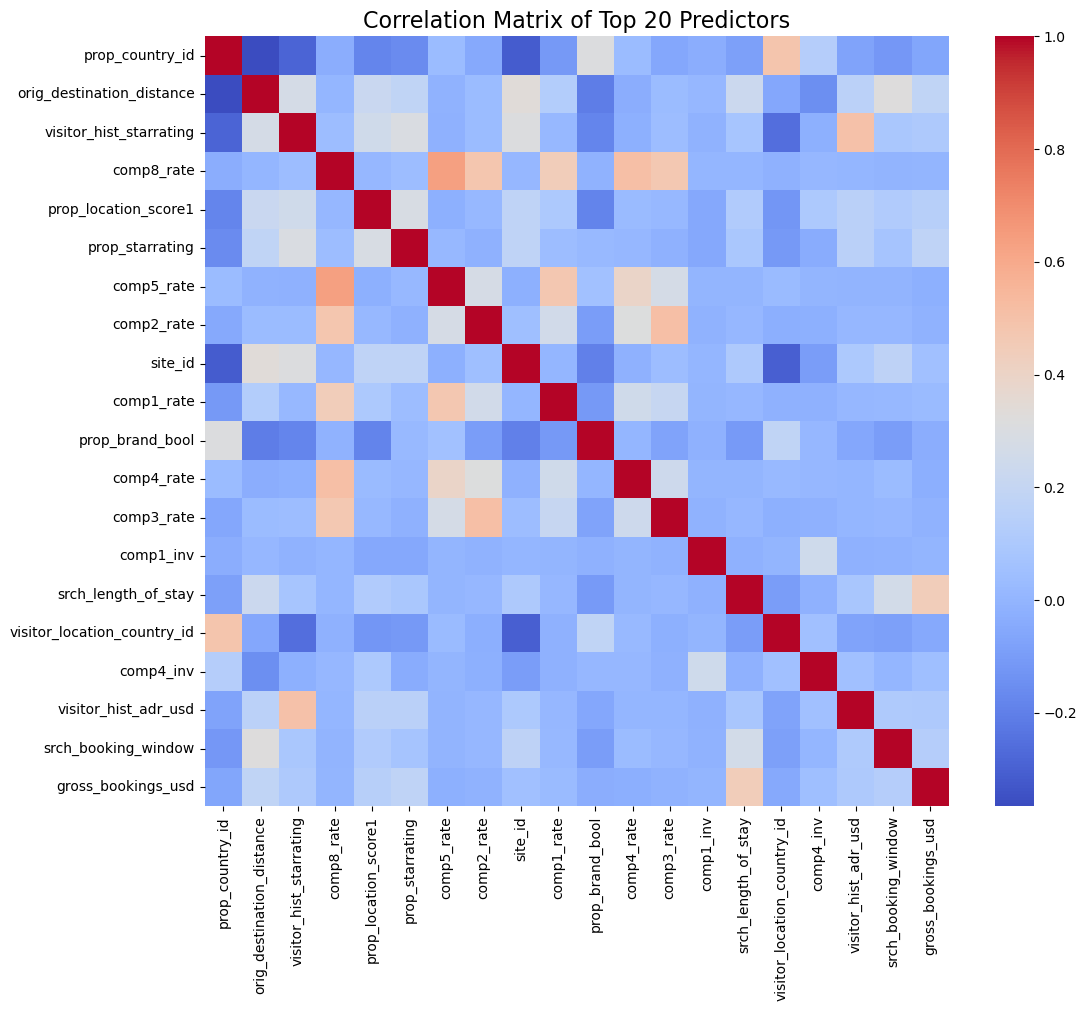

In [19]:
# Compute the correlation matrix of top 20
correlation_matrix = training_df.corr()

# Compute the degree of correlation for each variable
degree_of_correlation = correlation_matrix.abs().sum()

# Get the top 20 most correlated predictors
top_20_features = degree_of_correlation.nlargest(20).index

# Create a subset correlation matrix with the top 20 features
subset_corr_matrix = correlation_matrix.loc[top_20_features, top_20_features]

# Plot the correlation heatmap
plt.figure(figsize=(12, 10))
ax = sns.heatmap(subset_corr_matrix, annot=False, cmap='coolwarm')
ax.set_title('Correlation Matrix of Top 20 Predictors', fontsize=16)
plt.savefig('/kaggle/working/corr_map.png', dpi=300)
plt.show()


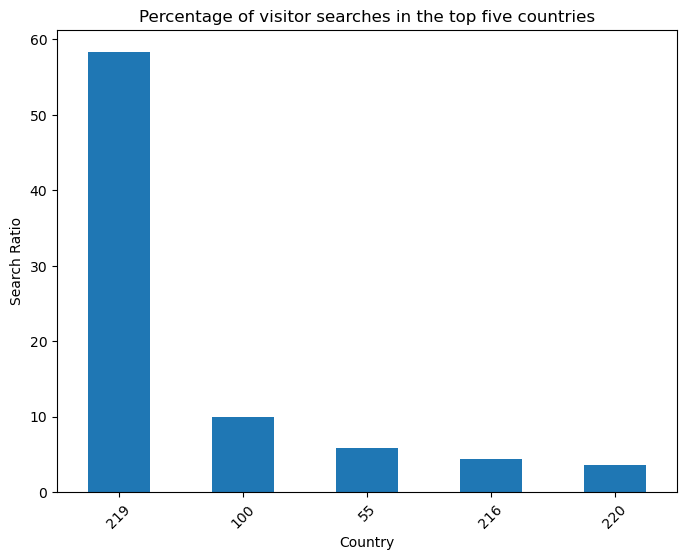

In [43]:
df = training_df

# Group the data by country/region and calculate the search frequency for each country/region.
visitor_search_freq = df.groupby('visitor_location_country_id')['srch_id'].count()

visitor_search_percent = visitor_search_freq / visitor_search_freq.sum() * 100

visitor_search_percent_sorted = visitor_search_percent.sort_values(ascending=False)

top_five_countries = visitor_search_percent_sorted.head(5)

plt.figure(figsize=(8, 6))
top_five_countries.plot(kind='bar')
plt.xlabel('Country')
plt.ylabel('Search Ratio')
plt.title('Percentage of visitor searches in the top five countries')
plt.xticks(rotation=45)
plt.savefig('/kaggle/working/relation_1.png', dpi=300)
plt.show()

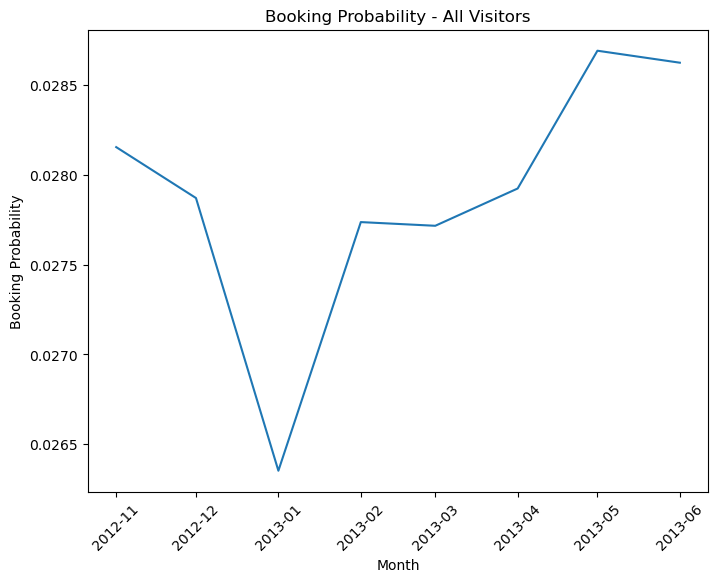

In [44]:
df['date_time'] = pd.to_datetime(df['date_time'])

# Group the data by month and calculate the average of the booking probabilities
booking_prob_all = df.groupby(df['date_time'].dt.to_period('M'))['booking_bool'].mean()

booking_prob_all.index = booking_prob_all.index.to_timestamp()

date_fmt = mdates.DateFormatter('%Y-%m')

plt.figure(figsize=(8, 6))
plt.plot(booking_prob_all.index, booking_prob_all.values)
plt.xlabel('Month')
plt.ylabel('Booking Probability')
plt.xticks(rotation=45)
plt.title('Booking Probability - All Visitors')
plt.gca().xaxis.set_major_formatter(date_fmt)
plt.show()

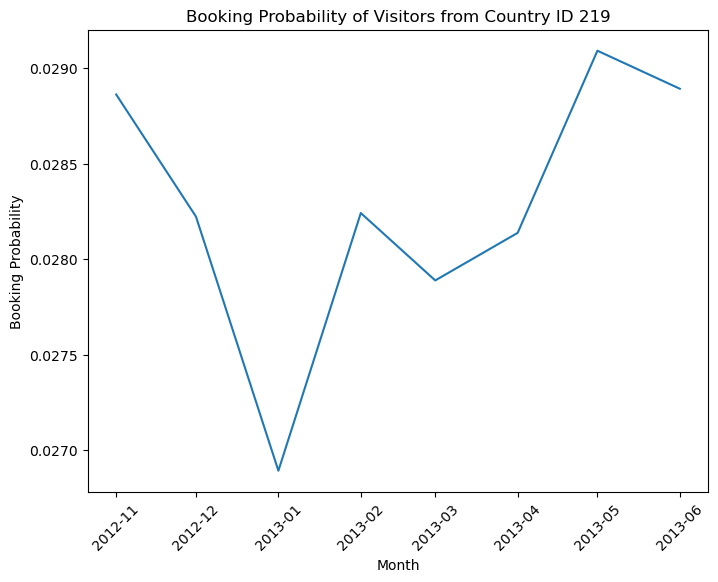

In [45]:
# Filter data for country ID 219
df['date_time'] = pd.to_datetime(df['date_time'])

country_219 = df[df['visitor_location_country_id'] == 219]

booking_prob_219 = country_219.groupby(country_219['date_time'].dt.to_period('M'))['booking_bool'].mean()

booking_prob_219.index = booking_prob_219.index.to_timestamp()

date_fmt = mdates.DateFormatter('%Y-%m')

plt.figure(figsize=(8, 6))
plt.plot(booking_prob_219.index, booking_prob_219.values)
plt.xlabel('Month')
plt.ylabel('Booking Probability')
plt.xticks(rotation=45)
plt.title('Booking Probability of Visitors from Country ID 219')
plt.gca().xaxis.set_major_formatter(date_fmt)
plt.savefig('/kaggle/working/relation_3.png', dpi=300)
plt.show()

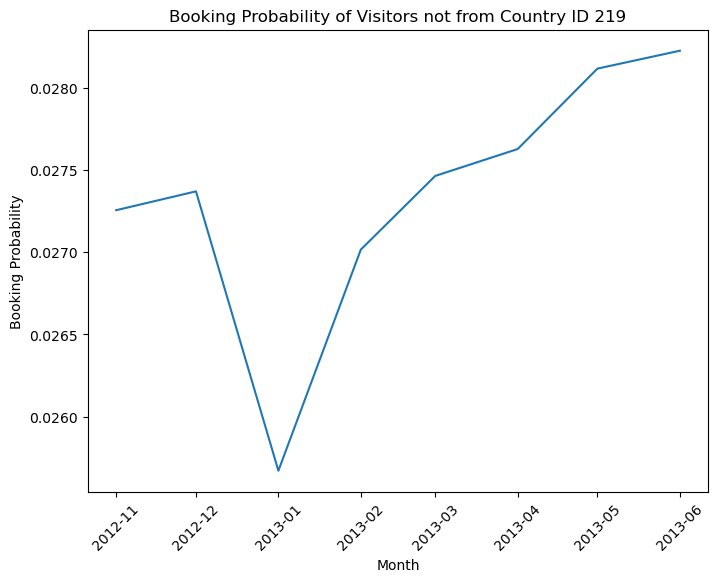

In [46]:
# Filter data except country ID 219
df['date_time'] = pd.to_datetime(df['date_time'])

country_219 = df[df['visitor_location_country_id'] != 219]

booking_prob_219 = country_219.groupby(country_219['date_time'].dt.to_period('M'))['booking_bool'].mean()

booking_prob_219.index = booking_prob_219.index.to_timestamp()

date_fmt = mdates.DateFormatter('%Y-%m')

plt.figure(figsize=(8, 6))
plt.plot(booking_prob_219.index, booking_prob_219.values)
plt.xlabel('Month')
plt.ylabel('Booking Probability')
plt.xticks(rotation=45)
plt.title('Booking Probability of Visitors not from Country ID 219')
plt.gca().xaxis.set_major_formatter(date_fmt)
plt.savefig('/kaggle/working/relation_4.png', dpi=300)
plt.show()